# Lab 7: Implement a Neural Network for Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import time


In this lab assignment, you will implement a neural network that performs sentiment analysis for a binary classification problem. You will:

1. Load the book review data set.
2. Create training and test datasets.
3. Transform the training and test text data using a TF-IDF vectorizer. 
4. Construct a neural network
5. Train the neural network.
6. Compare the model's performance on the training data vs test data.
7. Improve its generalization performance.

For this lab, you may use the following demos as reference: <i>Transforming Text into Features for Sentiment Analysis</i> and <i>Implementing a Neural Network in Keras</i>. 

**<font color='red'>Note: some of the code cells in this notebook may take a while to run</font>**

## Part 1:  Load the Data Set

We will work with the book review data set that contains book reviews taken from Amazon.com reviews.

<b>Task</b>: In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`.

You will be working with the file named "bookReviews.csv" that is located in a folder named "data".

In [2]:
# YOUR CODE HERE
filename = os.path.join(os.getcwd(), "data", "bookReviews.csv")
df = pd.read_csv(filename, header=0)

In [3]:
df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


In [4]:
df.shape

(1973, 2)

## Part 2: Create Training and Test Data Sets

### Create Labeled Examples

<b>Task</b>: Create labeled examples from DataFrame `df`. 
In the code cell below carry out the following steps:

* Get the `Positive_Review` column from DataFrame `df` and assign it to the variable `y`. This will be our label.
* Get the `Review` column from  DataFrame `df` and assign it to the variable `X`. This will be our feature. 


In [5]:
# YOUR CODE HERE
y = df['Positive Review']
X = df['Review']

In [6]:
X.head()

0    This was perhaps the best of Johannes Steinhof...
1    This very fascinating book is a story written ...
2    The four tales in this collection are beautifu...
3    The book contained more profanity than I expec...
4    We have now entered a second time of deep conc...
Name: Review, dtype: object

In [7]:
X.shape

(1973,)

### Split Labeled Examples into Training and Test Sets


<b>Task</b>: In the code cell below, create training and test sets out of the labeled examples. 

1. Use scikit-learn's `train_test_split()` function to create the data sets.

2. Specify:
    * A test set that is 20 percent of the size of the data set.
    * A seed value of '1234'. 
    

In [8]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1234) 

In [9]:
X_train.head()

1369    As my brother said when flipping through this ...
1366    Cooper's book is yet another warm and fuzzy ma...
385     I have many robot books and this is the best a...
750     As China re-emerges as a dominant power in the...
643     I have been a huge fan of Michael Crichton for...
Name: Review, dtype: object

## Part 3:  Implement TF-IDF Vectorizer to Transform Text


In the code cell below, you will transform the features into numerical vectors using `TfidfVectorizer`. 


<b>Task:</b> Follow the steps to complete the code in the cell below:

1. Create a `TfidfVectorizer` object and save it to the variable `tfidf_vectorizer`.

2. Call `tfidf_vectorizer.fit()` to fit the vectorizer to the training data `X_train`.

3. Call the `tfidf_vectorizer.transform()` method to use the fitted vectorizer to transform the training data `X_train`. Save the result to `X_train_tfidf`.

4. Call the `tfidf_vectorizer.transform()` method to use the fitted vectorizer to transform the test data `X_test`. Save the result to `X_test_tfidf`.

In [10]:
# 1. Create a TfidfVectorizer object 
# YOUR CODE HERE
tfidf_vectorizer = TfidfVectorizer()

# 2. Fit the vectorizer to X_train
# YOUR CODE HERE
tfidf_vectorizer.fit(X_train)

# 3. Using the fitted vectorizer, transform the training data 
# YOUR CODE HERE
X_train_tfidf = tfidf_vectorizer.transform(X_train)

# 4. Using the fitted vectorizer, transform the test data 
# YOUR CODE HERE
X_test_tfidf = tfidf_vectorizer.transform(X_test)


When constructing our neural network, we will have to specify the `input_shape`, meaning the dimensionality of the input layer. This corresponds to the dimension of each of the training examples, which in our case is our vocabulary size. Run the code cell below to see the vocabulary size.


In [11]:
vocabulary_size = len(tfidf_vectorizer.vocabulary_)

print(vocabulary_size)

19029


## Part 4: Construct a Neural Network


### Step 1.  Define Model Structure

Next we will create our neural network structure. We will create an input layer, three hidden layers and an output layer:

* <b>Input layer</b>: The input layer will have the input shape corresponding to the vocabulary size. 
* <b>Hidden layers</b>: We will create three hidden layers of widths (number of nodes) 64, 32, and 16. They will utilize the ReLu activation function. 
* <b>Output layer</b>: The output layer will have a width of 1. The output layer will utilize the sigmoid activation function. Since we are working with binary classification, we will be using the sigmoid activation function to map the output to a probability between 0.0 and 1.0. We can later set a threshold and assume that the prediction is class 1 if the probability is larger than or equal to our threshold, or class 0 if it is lower than our threshold.

To construct the neural network model using Keras, we will do the following:
* We will use the Keras `Sequential` class to group a stack of layers. This will be our neural network model object.
* We will use the `Dense` class to create each layer. 
* We will add each layer to the neural network model object.


<b>Task:</b> Follow these steps to complete the code in the cell below:

1. Create the neural network model object. 
    * Use ``keras.Sequential() `` to create a model object, and assign the result to the variable ```nn_model```.
    
    
2. Create the input layer: 
    * Call `keras.layers.Dense()` with the argument `input_shape=(vocabulary_size,)` to specify the dimension of the input.
    * Assign the results to the variable `input_layer`.
    * Use `nn_model.add(input_layer)` to add the layer `input_layer` to the neural network model object.


3. Create the first hidden layer:
    * Call `keras.layers.Dense()` with the arguments `units=64` and `activation='relu'`. 
    * Assign the results to the variable `hidden_layer_1`.
    * Use `nn_model.add(hidden_layer_1)` to add the layer `hidden_layer_1` to the neural network model object.


4. Create the second hidden layer using the same approach that you used to create the first hidden layer, specifying 32 units and the `relu` activation function. 
    * Assign the results to the variable `hidden_layer_2`.
    * Add the layer to the neural network model object.
    
    
5. Create the third hidden layer using the same approach that you used to create the first two hidden layers, specifying 16 units and the `relu` activation function. 
    * Assign the results to the variable `hidden_layer_3`.
    * Add the layer to the neural network model object.


6. Create the output layer using the same approach that you used to create the hidden layers, specifying 1 unit and the `signmoid` activation function. 
   * Assign the results to the variable `output_layer`.
   * Add the layer to the neural network model object.
   

In [12]:
# 1. Create model object
# YOUR CODE HERE
nn_model = keras.Sequential()


# 2. Create the input layer and add it to the model object: 

# Create input layer:
input_layer = keras.layers.InputLayer(input_shape=(vocabulary_size))

# Add input_layer to the model object:
# YOUR CODE HERE
nn_model.add(input_layer)


# 3. Create the first hidden layer and add it to the model object:


# Create input layer:
hidden_layer_1 = keras.layers.Dense(units=64, activation='relu')

# Add hidden_layer_1 to the model object:
# YOUR CODE HERE
nn_model.add(hidden_layer_1)


# 4. Create the second layer and add it to the model object:

# Create input layer:
hidden_layer_2 = keras.layers.Dense(units=32, activation='relu')

# Add hidden_layer_2 to the model object:
# YOUR CODE HERE
nn_model.add(hidden_layer_2)
nn_model.add(keras.layers.Dropout(.25))


# 5. Create the third layer and add it to the model object:

# Create input layer:
hidden_layer_3 = keras.layers.Dense(units=16, activation='relu')

# Add hidden_layer_3 to the model object:
# YOUR CODE HERE
nn_model.add(hidden_layer_3)
nn_model.add(keras.layers.Dropout(.25))


# 6. Create the output layer and add it to the model object:

# Create input layer:
output_layer = keras.layers.Dense(units=1, activation='sigmoid')

# Add output_layer to the model object:
# YOUR CODE HERE
nn_model.add(output_layer)


# Print summary of neural network model structure
nn_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1217920   
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,220,545
Trainable params: 1,220,545
Non-trainable params: 0
______________________________________________

### Step 2. Define the Optimization Function

<b>Task:</b> In the code cell below, create a stochastic gradient descent optimizer using  `keras.optimizers.SGD()`. Specify a learning rate of 0.1 using the `learning_rate` parameter. Assign the result to the variable`sgd_optimizer`.

In [13]:
# YOUR CODE HERE
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)

### Step 3. Define the Loss Function

<b>Task:</b> In the code cell below, create a binary cross entropy loss function using `keras.losses.BinaryCrossentropy()`. Use  the parameter `from_logits=False`. Assign the result to the variable  `loss_fn`.

In [14]:
# YOUR CODE HERE
loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)

### Step 4. Compile the Model

<b>Task:</b> In the code cell below, package the network architecture with the optimizer and the loss function using the `compile()` method. 


You will specify the optimizer, loss function and accuracy evaluation metric. Call the `nn_model.compile()` method with the following arguments:
* Use the `optimizer` parameter and assign it your optimizer variable:`optimizer=sgd_optimizer`
* Use the `loss` parameter and assign it your loss function variable: `loss=loss_fn`
* Use the `metrics` parameter and assign it the `accuracy` evaluation metric: `metrics=['accuracy']`
   

In [15]:
# YOUR CODE HERE
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

## Part 5. Fit the Model on the Training Data

We will define our own callback class to output information from our model while it is training. Make sure you execute the code cell below so that it can be used in subsequent cells.

In [16]:
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))


<b>Task:</b> In the code cell below, fit the neural network model to the vectorized training data.

1. Call `nn_model.fit()` with the training data `X_train_tfidf` and `y_train` as arguments. Note that `X_train_tfidf` is currently of type sparse matrix. The Keras `fit()` method requires that input data be of specific types. One type that is allowed is a NumPy array. Convert `X_train_tfidf` to a NumPy array using the `toarray()` method.


2. In addition, specify the following parameters:

    * Use the `epochs` parameter and assign it the variable to `epochs`: `epochs=num_epochs`
    * Use the `verbose` parameter and assign it the value of  0: `verbose=0`
    * Use the `callbacks` parameter and assign it a list containing our logger function: 
    `callbacks=[ProgBarLoggerNEpochs(num_epochs_M, every_n=50)]`  
    * We will use a portion of our training data to serve as validation data. Use the  `validation_split` parameter and assign it the value `0.2`
    
    
    
3. Save the results to the variable `history`. 

<b>Note</b>: This may take a while to run.

In [17]:
t0 = time.time() # start time

num_epochs = 25 #epochs

history = nn_model.fit(X_train_tfidf.toarray(), y_train, epochs=num_epochs, verbose=0, callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=25)], validation_split=0.2)


t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

print('the results here are different then when i was testing them out, and i think it has to do with the servers!')
print('please take a look at the results in the analysis below!! :)')



Epoch [25/ 25], Loss: 0.2095, Accuracy: 0.9390, Val_loss: 0.4217, Val_accuracy: 0.8070
Elapsed time: 7.85s
the results here are different then when i was testing them out, and i think it has to do with the servers!
please take a look at the results in the analysis below!! :)


### Visualize the Model's Performance Over Time

The code above outputs both the training loss and accuracy and the validation loss and accuracy. Let us visualize the model's performance over time:

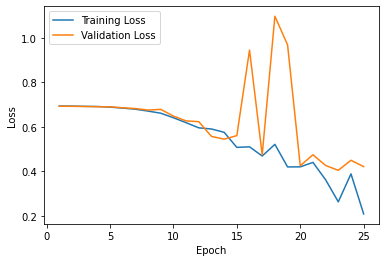

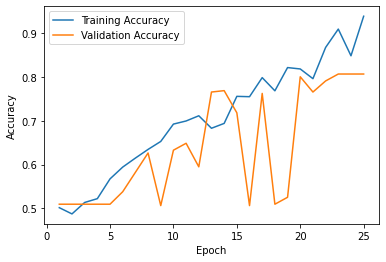

In [18]:
# Plot training and validation loss
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Part 6. Improve the Model and Evaluate the Performance

We just evaluated our model's performance on the training and validation data. Let's now evaluate its performance on our test data and compare the results.

Keras makes the process of evaluating our model very easy. Recall that when we compiled the model we specified the metric we wanted to use to evaluate the model: accuracy. The Keras method `evaluate()` will return the loss and accuracy score of our model on our test data.

<b>Task:</b> In the code cell below, call `nn_model.evaluate()` with `X_test_tfidf` and `y_test` as arguments. You must convert `X_test_tfidf` to a NumPy array using the `toarray()` method. 

Note: The `evaluate()` method returns a list containing two values. The first value is the loss and the second value is the accuracy score.


In [19]:
loss, accuracy = nn_model.evaluate(X_test_tfidf.toarray(), y_test)


print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

13/13 [==============================] - 0s 3ms/step - loss: 0.4069 - accuracy: 0.8203
Loss:  0.4068804383277893 Accuracy:  0.8202531933784485


### Prevent Overfitting and Improve Model's Performance

Neural networks can be prone to overfitting. Notice that the training accuracy is 100% but the test accuracy is around 82%. This indicates that our model is overfitting; it will not perform as well to new, previously unseen data as it did during training. We want to have an accurate idea of how well our model will generalize. Our goal is to have our training and testing accuracy scores be as close as possible.

While there are different techniques that can be used to prevent overfitting, for the purpose of this exercise, we will focus on two methods:

1. Changing the number of epochs. Too many epochs can lead to overfitting of the training dataset, whereas too few epochs may result in underfitting.

2. Adding dropout regularization. During training, the nodes of a particular layer may always become influenced only by the output of a particular node in the previous layer, causing overfitting. Dropout regularization is a technique that randomly drops a number of nodes in a neural network during training as a way to adding randomization and prevent nodes from becoming dependent on one another. Adding dropout regularization can reduce overfitting and also improve the performance of the model. 

<b>Task:</b> 

1. Tweak the variable `num_epochs` above and restart and rerun all of the cells above. Evaluate the performance of the model on the training data and the test data.

2. Add Keras `Dropout` layers after one or all hidden layers. Add the following line of code after you add a hidden layer to your model object:  `nn_model.add(keras.layers.Dropout(.25))`. The parameter `.25` is the fraction of the nodes to drop. You can experiment with this value as well. Restart and rerun all of the cells above. Evaluate the performance of the model on the training data and the test data.


<b>Analysis:</b> 
In the cell below, specify the different approaches you used to reduce overfitting and summarize which configuration led to the best generalization performance.

Did changing the number of epochs prevent overfitting? Which value of `num_epochs` yielded the closest training and testing accuracy score? Recall that too few epochs can lead to underfitting (both poor training and test performance). Which value of `num_epochs` resulted in the best accuracy score when evaluating the test data?

Did adding dropout layers prevent overfitting? How so? Did it also improve the accuracy score when evaluating the test data? How many dropout layers did you add and which fraction of nodes did you drop? 

Record your findings in the cell below.

When i changed the epochs num to 75 and added the Dropout layer after one of the hidden layers, the accuracy stayed 100%, which indicated that the model was still overfitting, however the val accuracy decreased. that being said, when i added a second dropout layer, i noticed that the accuracy finally budged from being 100%. adding a third dropout layer decreased the val accuracy, so i'll stick to testing on two layers with a fraction of 0.25

25 num_epochs gave the following results:

Epoch [25/ 25], Loss: 0.4699, Accuracy: 0.7868, Val_loss: 0.6089, Val_accuracy: 0.6930
Elapsed time: 9.29s

50 num epochs gave the following results:

Epoch [50/ 50], Loss: 0.0061, Accuracy: 1.0000, Val_loss: 0.6386, Val_accuracy: 0.8038
Elapsed time: 16.27s

75 num epochs gave the following results:

Epoch [75/ 75], Loss: 0.5697, Accuracy: 0.7163, Val_loss: 0.5914, Val_accuracy: 0.6329
Elapsed time: 30.59s

100 num epochs gave the following results: WE'RE STARTING TO OVERFIT AGAIN

Epoch [100/ 100], Loss: 0.0026, Accuracy: 1.0000, Val_loss: 0.7000, Val_accuracy: 0.8228
Elapsed time: 37.17s

125 num epochs gave the following results:

Epoch [125/ 125], Loss: 0.0021, Accuracy: 1.0000, Val_loss: 1.4075, Val_accuracy: 0.7722
Elapsed time: 39.45s

150 num epochs gave the following results:

Epoch [150/ 150], Loss: 0.3340, Accuracy: 0.9025, Val_loss: 1.0391, Val_accuracy: 0.5791
Elapsed time: 42.36s

175 num epochs gave the following results:

Epoch [175/ 175], Loss: 0.0024, Accuracy: 1.0000, Val_loss: 0.9356, Val_accuracy: 0.8006
Elapsed time: 48.18s

200 num epochs gave the following results:

Epoch [200/ 200], Loss: 0.0018, Accuracy: 1.0000, Val_loss: 1.0975, Val_accuracy: 0.8228
Elapsed time: 55.89s

as a result, we can see that the number of epochs that gave us the closest results between the accuracy and the val accuracy is the 25 num epochs.

### Make Predictions on the Test Set

Now that we have our best performing model that can generalize to new, previously unseen data, let us make predictions using our test data.

In the cell below, we will make a prediction on our test set using the `predict()` method, receive a probability between 0.0 and 1.0, and then apply a threshold to obtain the the predicted class for each example. We will use a threshold of 0.5.

For the first 10 examples, we will output their probabilities and the corresponding classes. Examine the output to see how this works.

In [20]:
probability_predictions = nn_model.predict(X_test_tfidf.toarray())

print("Predictions for the first 10 examples:")
print("Probability\t\t\tClass")
for i in range(0,10):
    if probability_predictions[i] >= .5:
        class_pred = "Good Review"
    else:
        class_pred = "Bad Review"
    print(str(probability_predictions[i]) + "\t\t\t" + str(class_pred))

Predictions for the first 10 examples:
Probability			Class
[0.94958645]			Good Review
[0.8595574]			Good Review
[0.7149302]			Good Review
[0.2771253]			Bad Review
[0.8963187]			Good Review
[0.73072416]			Good Review
[0.10527304]			Bad Review
[0.02587721]			Bad Review
[0.9703058]			Good Review
[0.96765625]			Good Review


Let's check two book reviews and see if our model properly predicted whether the reviews are good or bad reviews.

In [21]:
print('Review #1:\n')
print(X_test.to_numpy()[56])

goodReview = True if probability_predictions[56] >= .5 else False
    
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[56]))

Review #1:

This commentary has many tremendous insights into the book of Romans.  Romans is one of the richest resources of truth within the Bible and John Stoot does a good job of unpacking it.  The book is written from a framework of the reader having a strong prior understanding of the Scriptures.  It is probably not considered a highly scholarly work, but it is not for the average reader to pick up for light reading either


Prediction: Is this a good review? True

Actual: Is this a good review? True



In [22]:
print('Review #2:\n')
print(X_test.to_numpy()[24])

goodReview = True if probability_predictions[24] >= .5 else False

print('\nPrediction: Is this a good review? {}\n'.format(goodReview)) 

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[24]))

Review #2:

I have read Baldacci's first four novels and have immensely enjoyed all of them.  This one, however, is just awful.  Not only the character's dialogue but even the story itself is written like a really bad detective movie.  The only thing I can think of to compare it to is this :  There was a series of Calvin and Hobbes cartoons where Calvin imagines himself as a private detective and they are written like the old detective shows, with lame lines like "The gun was loaded, and so was I".  That is exactly what this book is like, except it goes on for 400 pages.  There isn't a single interesting character in this book, in my opinion.  You just have to slog your way through the book to get to the end.  It's the Bataan Death March of novels.  I hope this is an aberration - I'll certainly give him another try since the first four novels that I read were so good.  But one more stinker like this one and I'll drop his name from my reading list


Prediction: Is this a good review? Fa

### Deep Dive (Ungraded):

Experiment with the vectorizer and neural network implementation above and compare your results every time you train the network. Pay attention to the time it takes to train the network, and the resulting loss and accuracy on both the training and test data. 

Below are some ideas for things you can try:

* Adjust the learning rate.
* Add more hidden layers and/or experiment with different values for the `unit` parameter in the hidden layers to change the number of nodes in the hidden layers.
* Fit your vectorizer using different document frequency values and a different n-gram ranges. When creating a `TfidfVectorizer` object, use the parameter `min_df` to specify the minimum 'document frequency' and use `ngram_range=(1,2)` to change the default n-gram range of `(1,1)`.
